In [1]:
import torch
import neural_framework as nf
from tools import *

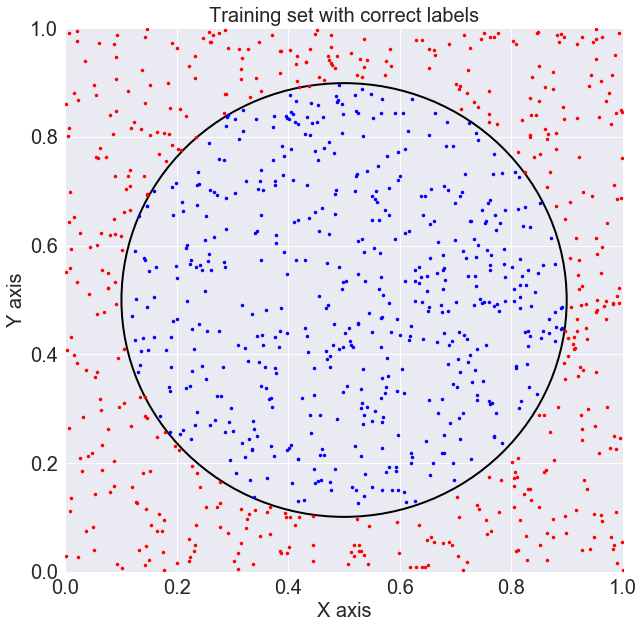

In [2]:
N = 1000
training_set = generate_dataset(N)       
test_set = generate_dataset(N)

plot_circle_with_labels(training_set,"Training set with correct labels")

NEURAL NETWORK ARCHITECTURE:
** Input layer with 2 nodes
** Linear layer with 25 nodes
** ReLU activation
** Linear layer with 25 nodes
** ReLU activation
** Linear layer with 25 nodes
** Tanh activation
** Linear layer with 2 nodes
** Mean Squared Error
NEURAL NETWORK PARAMETERS:
**Layer 1 has 75 parameters
-----Weights:  2 x 25
-----Biases :  1 x 25
**Layer 2 has 650 parameters
-----Weights:  25 x 25
-----Biases :  1 x 25
**Layer 3 has 650 parameters
-----Weights:  25 x 25
-----Biases :  1 x 25
**Layer 4 has 52 parameters
-----Weights:  25 x 2
-----Biases :  1 x 2


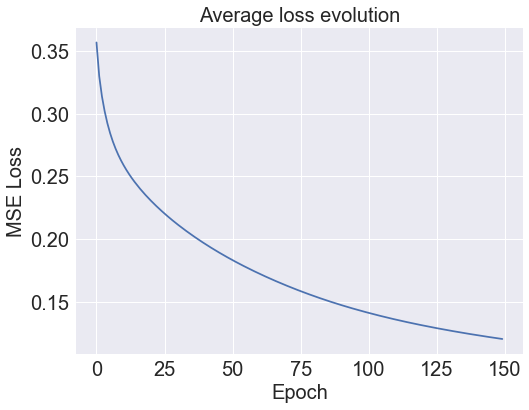

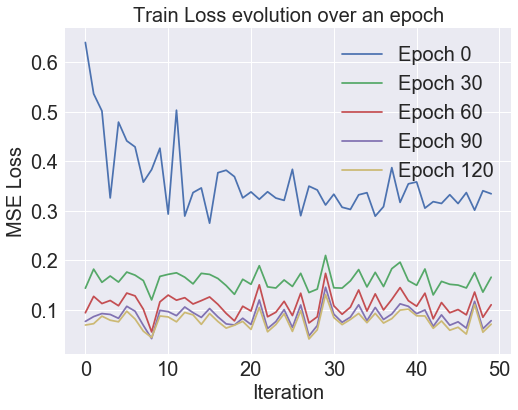

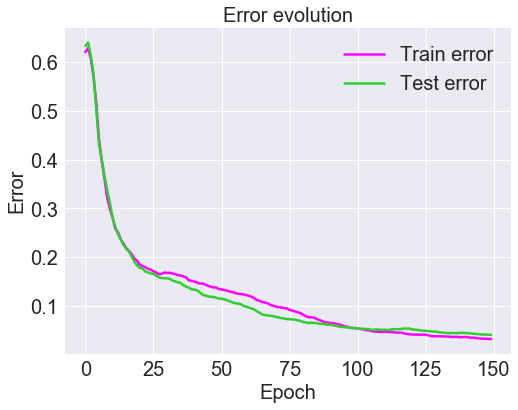

In [3]:
x = torch.from_numpy(training_set[:,0:2])    # Point coordinates
y = torch.from_numpy(training_set[:,2:])     # Labels
x_test = torch.from_numpy(test_set[:,0:2])
y_test = torch.from_numpy(test_set[:,2:])

D_in, H, D_out = 2,25,2                     # Number of nodes
model = nf.Sequential(                      # NN architecture
            nf.Linear(D_in,H),nf.ReLU(),    # 1st hidden layer
            nf.Linear(H,H),nf.ReLU(),       # 2nd hidden layer
            nf.Linear(H,H),nf.Tanh(),       # 3rd hidden layer
            nf.Linear(H,D_out),             # output layer
            nf.LossMSE())

B = 20                                       #Batch size
Xb,Yb = x.reshape(-1,B,2),y.reshape(-1,B,2)  # data splitted in batches
learning_rate = 1e-4                         # Learning rate
n_epochs = 150                               # Number of epochs
L,Lb,T,E = [],[],[],[]                       #Logs for loss and train_error

for t in range(n_epochs):
    for batch,label in zip(Xb,Yb):
        pred = model.forward(batch)                       # Feed-forward
        Lb.append(model.loss(pred,label))                 # Train Loss computation
        model.backward()                                  # Back-propagation
        model.learn(learning_rate)                        # Weights update     
    L.append(sum(Lb)/len(Lb))
    T.append(model.error(model.forward(x),y))
    E.append(model.error(model.forward(x_test),y_test))
    
parameters = model.param(show=1)
log_file(L,T,E)
plot_evolution(L,Lb,T,E)

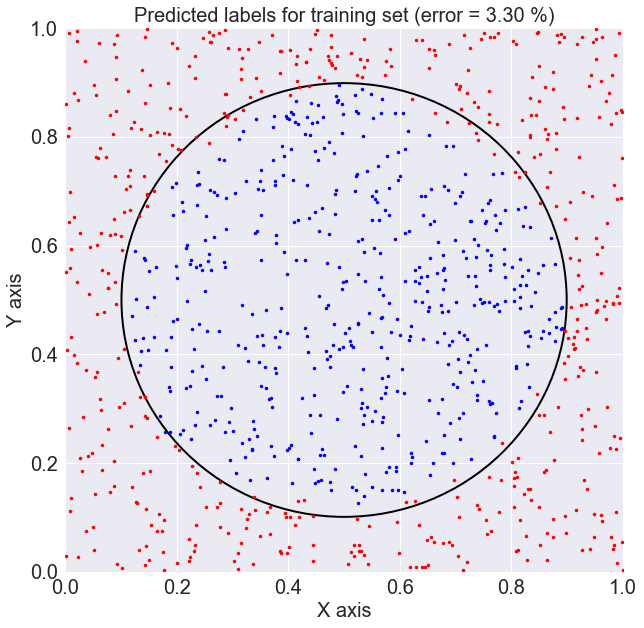

In [4]:
training_prediction = model.forward(x)
training_error = model.error(training_prediction,y)
check_result(x,training_prediction,training_error,N,"training")

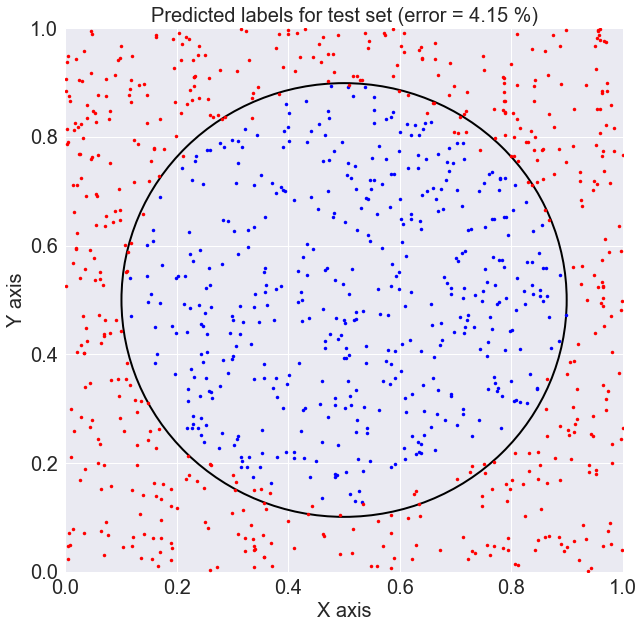

In [5]:
test_prediction = model.forward(x_test)
test_error = model.error(test_prediction,y_test)
check_result(x_test,test_prediction,test_error,N,"test")